In [12]:
from os.path  import join
import struct
from array import array
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import glob
import random
import numpy as np
import pandas as pd
#import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, Input
#from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt
import plotly.express as px
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import torch
from torch.utils.data import TensorDataset, DataLoader

from keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [3]:
train_data = pd.read_csv("./Human Action Recognition/Training_set.csv")
test_data = pd.read_csv("./Human Action Recognition/Testing_set.csv")
#print(train_data)
print(train_data.label.value_counts())
#actions = train_data.label.value_counts()
#plt.pie(actions.values,actions.index)

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64


In [4]:
def show_data_graph():
    actions_train = train_data.label.value_counts()
    fig = px.pie(train_data, values=actions_train.values, names=actions_train.index, title='Distribution of Human Activity')
    fig.show()

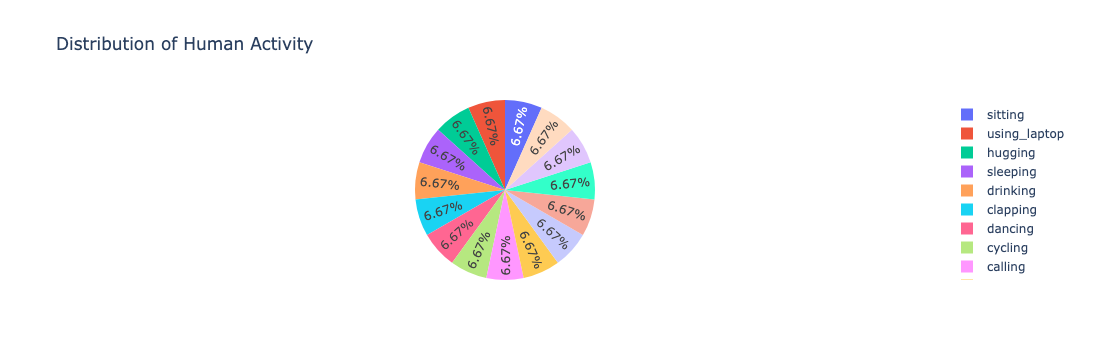

In [5]:
show_data_graph()

In [6]:
filename = train_data['filename']

action = train_data['label']

In [7]:

def print_random_image():
    for i in range(6):
        num = random.randint(1,10000)
        imgg = "Image_{}.jpg".format(num)
        train = "./Human Action Recognition/train/"
        if os.path.exists(train+imgg):
            testImage = img.imread(train+imgg)
            plt.subplot(2, 3, i+1)
            plt.imshow(testImage)
            plt.axis('off')
            plt.title("{}".format(train_data.loc[train_data['filename'] == "{}".format(imgg), 'label'].item()))
        
        else:
            #print(train+img)
            print("File Path not found \nSkipping the file!!")

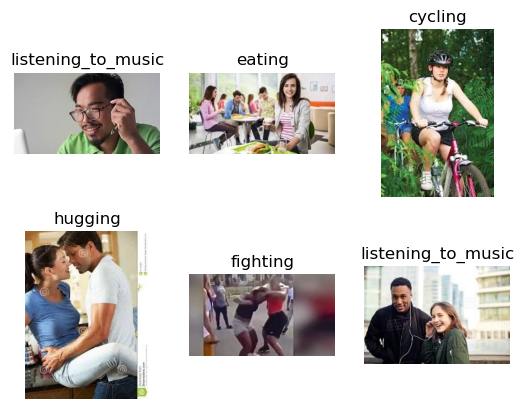

In [8]:
print_random_image()

In [9]:
x_train = []
y_train = []
length = len(train_data)
for i in (range(len(train_data))):
    t = './Human Action Recognition/train/' + filename[i]    
    temp_img = Image.open(t)
    x_train.append(np.asarray(temp_img.resize((256,256))))
    y_train.append(action[i])
img_shape= (160,160,3)
x_train = x_train
x_train = np.asarray(x_train)
type(x_train)

numpy.ndarray

In [10]:
y_train = to_categorical(np.asarray(train_data["label"].factorize()[0]))
print(y_train[13])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [14]:
# Convert data to PyTorch tensors
train_images_tensor = torch.tensor(x_train, dtype=torch.float) / 255.0  # Normalize
train_labels_tensor = torch.tensor(y_train, dtype=torch.long)
#test_images_tensor = torch.tensor(x_test, dtype=torch.float) / 255.0  # Normalize
#test_labels_tensor = torch.tensor(y_test, dtype=torch.long)
test_images_tensor=  train_images_tensor[0:1000]
train_images_tensor= train_images_tensor[1000:]
test_labels_tensor= train_labels_tensor[0:1000]
train_labels_tensor= train_labels_tensor[1000:]

# Create TensorDatasets
train_dataset = TensorDataset(train_images_tensor.unsqueeze(1), train_labels_tensor)  # Add channel dimension
test_dataset = TensorDataset(test_images_tensor.unsqueeze(1), test_labels_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

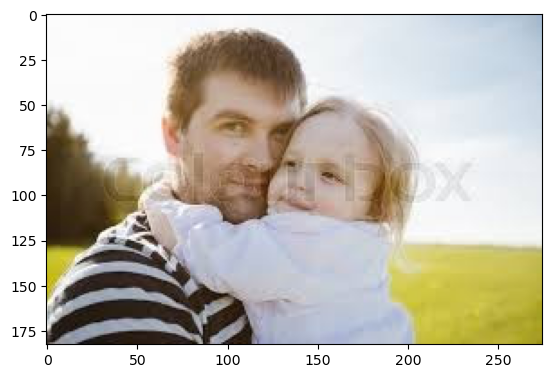

In [15]:
imgg = "Image_3.jpg"
train = "./Human Action Recognition/train/"
testImage = img.imread(train+imgg)
plt.imshow(testImage)

In [17]:
print(len(train_loader))
print(len(test_loader))

232
1


In [18]:
from keras.layers import Dense, Activation
from keras import Sequential
from keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [115]:
def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((256,256)))

In [116]:
actions_ = ['sitting','using_laptop','hugging','sleeping','drinking','clapping','dancing','cycling','calling','laughing','eating','fighting','listening_to_music','running','texting']



In [41]:
classes=train_data.label.value_counts()
num_classes=len(classes)
print(num_classes)
classes

15


label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [42]:
model=Sequential()

model.add(Input(shape=(256,256,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,641,999 (6.26 MB)

 Trainable params: 1,641,999 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit?

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It could be:
        - A NumPy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
        - A tensor, or a list of tensors
        (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
        - A `tf.data.Dataset`. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `keras.utils.PyDataset` returning `(inputs,
      

In [44]:
history=model.fit(x_train,y_train, epochs=25,batch_size=30)

Epoch 1/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 269s 638ms/step - accuracy: 0.1122 - loss: 3.6877
Epoch 2/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 299s 711ms/step - accuracy: 0.2412 - loss: 2.3106
Epoch 3/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 475s 1s/step - accuracy: 0.3064 - loss: 2.0769
Epoch 4/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 476s 1s/step - accuracy: 0.3853 - loss: 1.9013
Epoch 5/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 297s 706ms/step - accuracy: 0.4313 - loss: 1.7344
Epoch 6/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 314s 748ms/step - accuracy: 0.5110 - loss: 1.5012
Epoch 7/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 322s 767ms/step - accuracy: 0.5945 - loss: 1.2541
Epoch 8/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 318s 756ms/step - accuracy: 0.6659 - loss: 1.0233
Epoch 9/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 307s 730ms/step - accuracy: 0.7480 - loss: 0.7768
Epoch 10/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 278s 662ms/step - accuracy: 0.8180 - loss: 0.5548
Epoch 11/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 276s 657ms/step - accuracy: 0.8529 - loss: 0.4618
Epoch 12/25
42

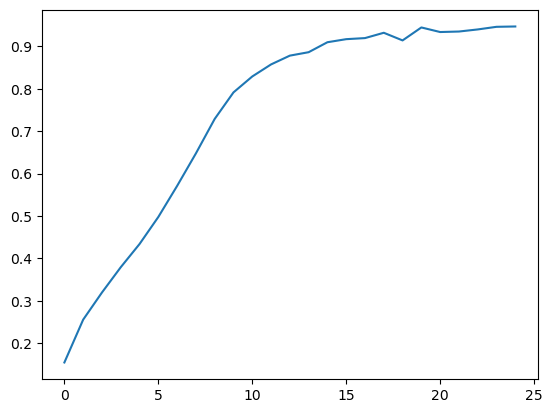

In [45]:
accuracy = history.history['accuracy']
plt.plot(accuracy)

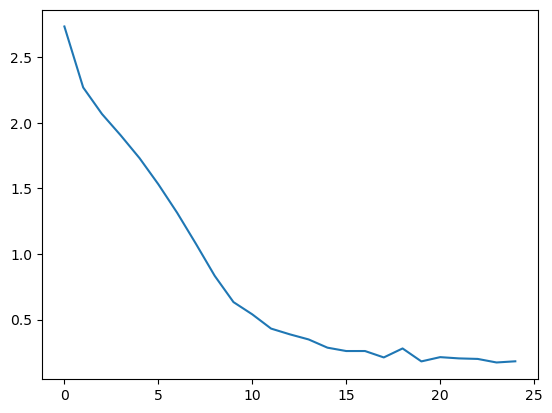

In [151]:
plt.plot(history.history['loss'])

In [85]:
actions_ = ['sitting','using_laptop','hugging','sleeping','drinking','clapping','dancing','cycling','calling','laughing','eating','fighting','listening_to_music','running','texting']



In [88]:
def test_predict2(test_image):
    result = model.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", actions_[prediction])
    
    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


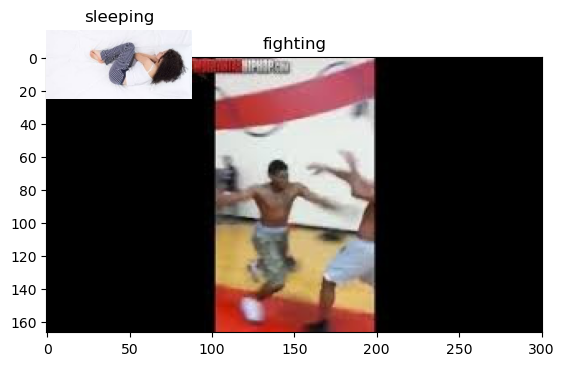

In [250]:
for i in range(100,110):
    imgg = "Image_{}.jpg".format(i)
    train = "./Human Action Recognition/train/"
    result = model.predict(np.asarray([read_img(train+imgg)]))
    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    #print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", actions_[prediction])
    k=0
    image = img.imread(train+imgg)
    
    plt.imshow(image)
    plt.title(actions_[prediction])
    plt.subplot(3, 3, k+1)
    plt.axis('off')
    k=k+1
    #plt.figure(i+1)
plt.show()
    
    
    

In [253]:
# Show example images
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(28, 28))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

In [256]:
random_images = []
for i in range(100, 110):
    imgg = "Image_{}.jpg".format(i)
    train = "./Human Action Recognition/train/"
    result = model.predict(np.asarray([read_img(train+imgg)]))
    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    
    r = random.randint(1, 60000)
    
    random_images.append((read_img(train+imgg), actions_[prediction]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


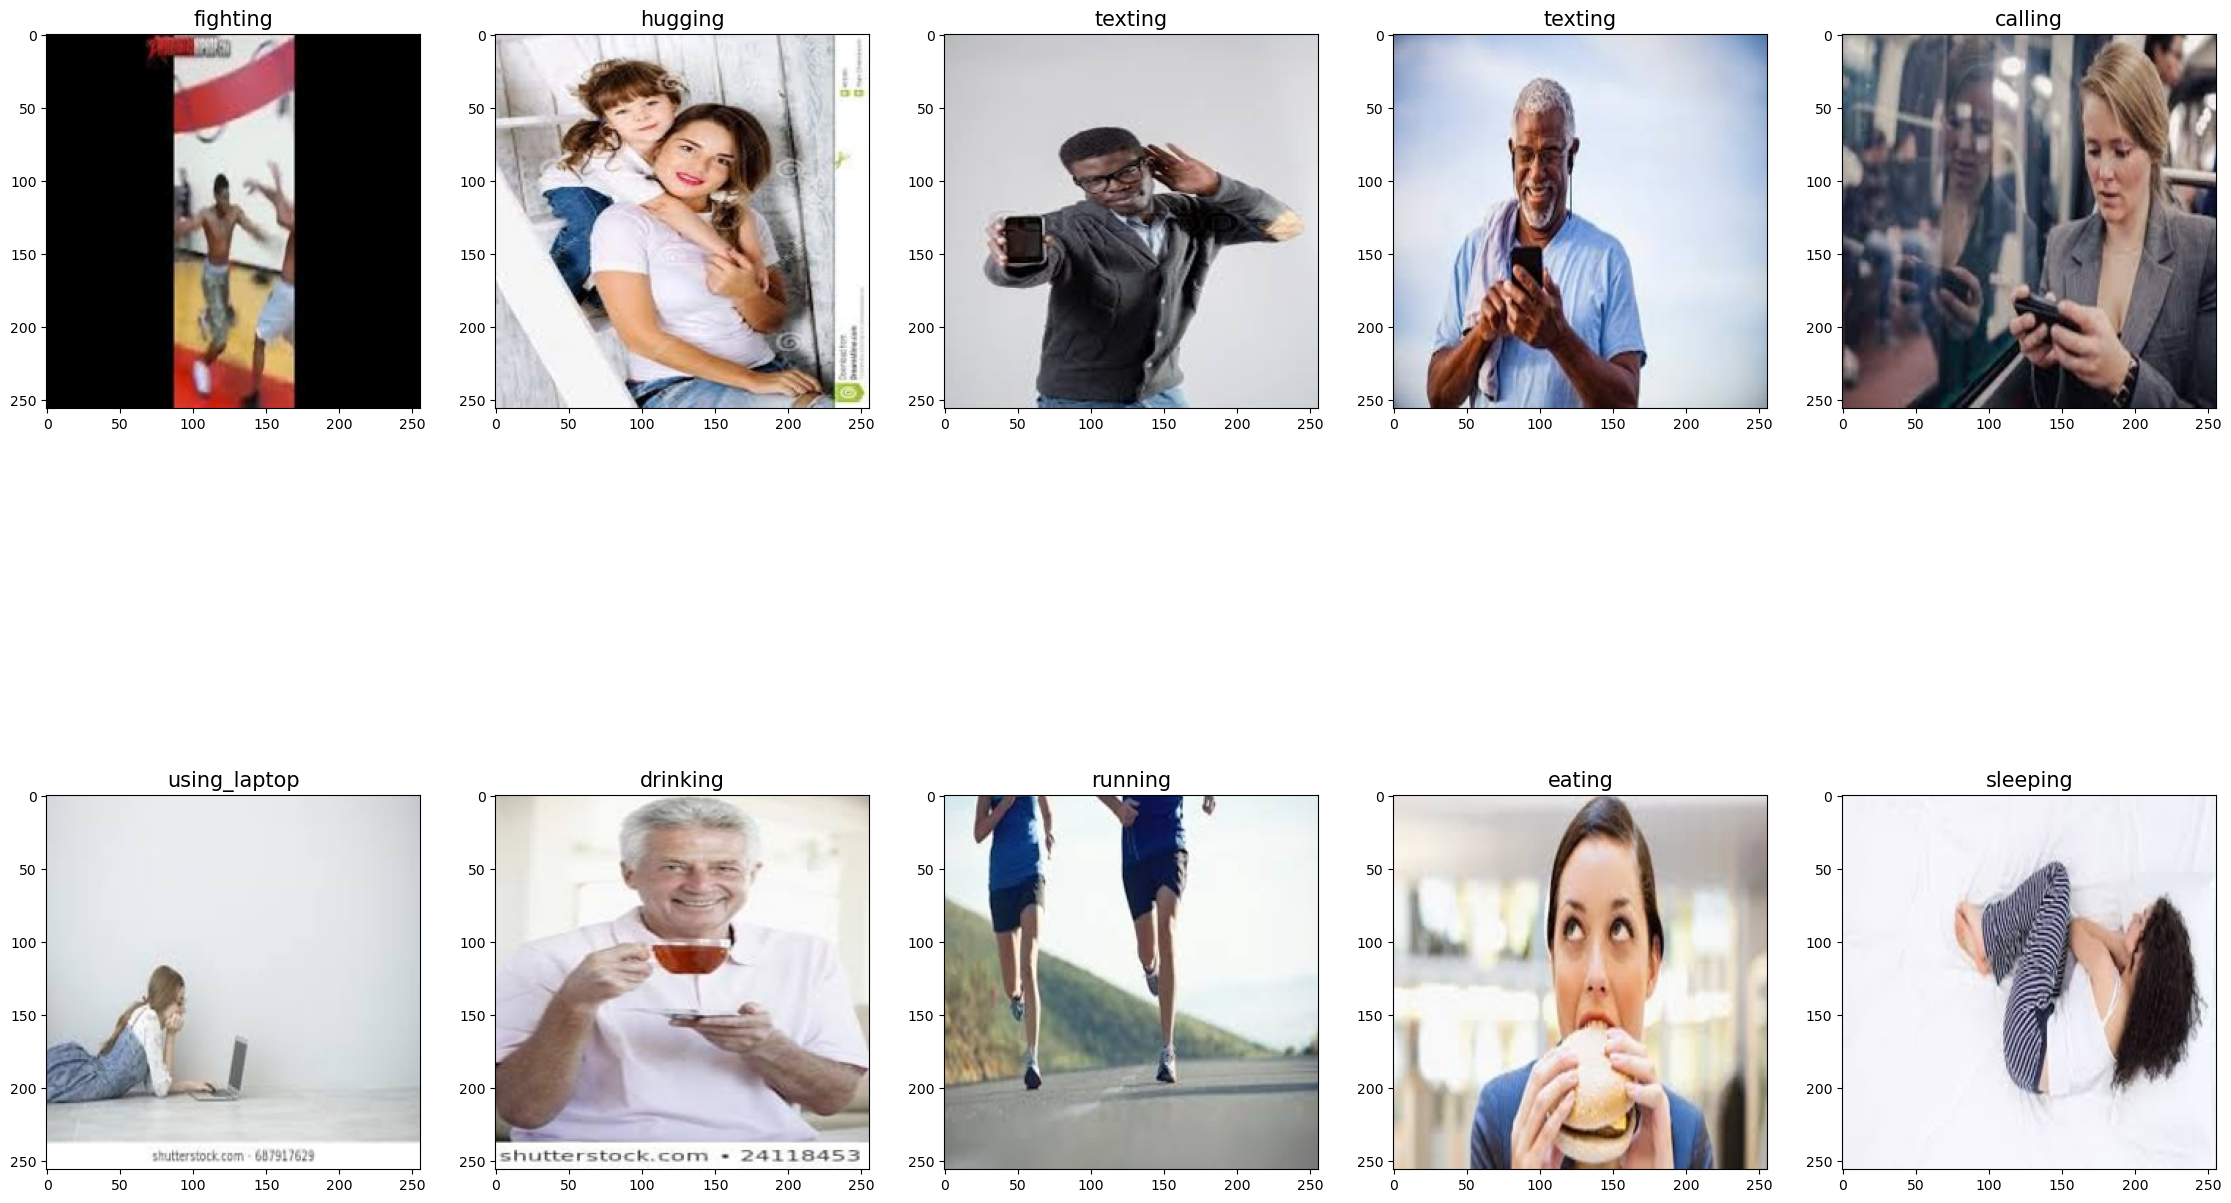

In [257]:
show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

In [ ]:
test_predict2("./Human Action Recognition/test/Image_132.jpg")